In [10]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset.csv')

df_download_media = df[(df.Tipo == "Download")].reset_index()

df_download_media

,index,Unnamed: 0,Operatore,Profilo,Velocità (down/up),Territorio,Periodo,Tipo,Media,Dev. Std.,Min,Max,TP%,Misure,Anno
0,0,0,Acantho,BigBand,"\n7,0Mbps512.0kbps\n",Nazionale,\nGen2014Giu2014\n,Download,"5,4Mbps","969,4","3,3Mbps","6,2Mbps",NaN,43900,2014
1,3,3,Acantho,BigBand,"\n20,0Mbps1,0Mbps\n",Nazionale,\nGen2014Giu2014\n,Download,"13,2Mbps","1398,1","10,5Mbps","15,0Mbps",NaN,43860,2014
2,6,6,Aruba,ADSL20Mb/384kb,"\n20,0Mbps384.0kbps\n",Nazionale,\nGen2014Giu2014\n,Download,"15,4Mbps",1744,"13,0Mbps","17,6Mbps",NaN,107140,2014
3,9,9,Aruba,ADSL7Mb/384kb,"\n7,0Mbps384.0kbps\n",Nazionale,\nGen2014Giu2014\n,Download,"6,7Mbps","326,8","6,2Mbps","6,8Mbps",NaN,108122,2014
4,12,12,Brennercom,AllesKlar,"\n8,0Mbps384.0kbps\n",Nazionale,\nGen2014Giu2014\n,Download,"7,7Mbps",64,"7,7Mbps","7,7Mbps",NaN,43840,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,941,941,Wind,"WindHomeADSL,3ADSL,AbsoluteADSL,AllInclusive,A...","\n12,0Mbps1,0Mbps\n",Nazionale,\nLug2022Dic2022\n,Download,"13,6Mbps","6543,8","11,8Mbps",NaN,NaN,8505,2022
633,942,942,Wind,"WindHomeADSL,3ADSL,AbsoluteADSL,AllInclusive,A...","\n14,0Mbps1,0Mbps\n",Nazionale,\nLug2022Dic2022\n,Download,"11,6Mbps","820,3","10,8Mbps",NaN,NaN,18045,2022
634,943,943,Wind,"WindHomeADSL,3ADSL,AbsoluteADSL,AllInclusive,A...","\n17,0Mbps1,0Mbps\n",Nazionale,\nLug2022Dic2022\n,Download,"15,0Mbps","31,7","15,0Mbps",NaN,NaN,9020,2022
635,944,944,Wind,"WindHomeADSL,3ADSL,AbsoluteADSL,AllInclusive,A...","\n20,0Mbps1,0Mbps\n",Nazionale,\nLug2022Dic2022\n,Download,"17,6Mbps","2327,6","16,2Mbps",NaN,NaN,33352,2022


In [11]:
import re
m = []
for i in range(0, len(df_download_media)):
    m.append(float(re.findall(r"[-+]?(?:\d*\,*\d+)", df_download_media.iloc[i].Media)[0].replace(',','.')))
df_download_media["media_f"] = m
df_download_media = df_download_media.groupby(["Operatore","Anno"]).mean().reset_index()
df_download_media.info()


TypeError: agg function failed [how->mean,dtype->object]

Acantho
2014
2015
2016
2017
2018
2019
2020
2021
2022
[9.274999999999999, 9.425, 9.15, nan, 9.525, 10.55, 9.8, 8.85, 9.025]
[2014 2015 2016 2017 2018 2019 2020 2021 2022]
Aruba
2014
2015
2016
2017
2018
2019
2020
2021
2022
[11.1, 11.15, 10.5, 10.5, 11.85, 11.450000000000001, nan, 13.299999999999999, 776.15]
[2014 2015 2016 2017 2018 2019 2020 2021 2022]
Brennercom
2014
2015
2016
2017
2018
2019
2020
2021
2022
[4.8, 4.8, 4.8, nan, 5.074999999999999, 5.05, 5.05, 5.05, 4.824999999999999]
[2014 2015 2016 2017 2018 2019 2020 2021 2022]
BritishTelecom
2014
2015
2016
2017
2018
2019
2020
2021
2022
[5.725, 6.0, 7.133333333333333, 8.6, 8.683333333333334, 9.0, 8.475, 8.983333333333334, 8.35]
[2014 2015 2016 2017 2018 2019 2020 2021 2022]
ColtTelecom
2014
2015
2016
2017
2018
2019
2020
2021
2022
[5.4, 5.300000000000001, nan, nan, nan, nan, nan, nan, nan]
[2014 2015 2016 2017 2018 2019 2020 2021 2022]
EnelEnergia
2014
2015
2016
2017
2018
2019
2020
2021
2022
[nan, nan, nan, nan, nan, nan, nan, 691.6, 72

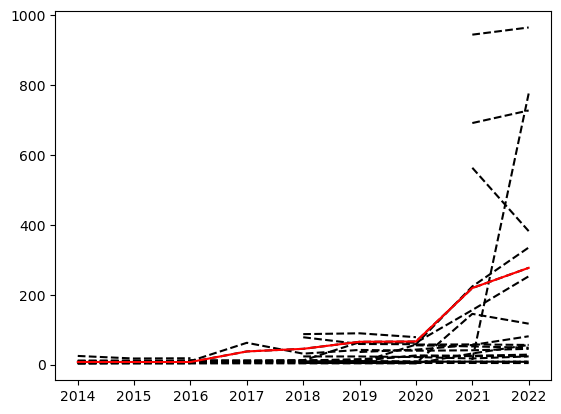

In [135]:
import matplotlib.pyplot as plt
anni = np.sort(df_download_media.Anno.unique())
tim_velocita = []
for operatore in df_download_media.Operatore.unique():
    print(operatore)
    velocita = []
    for anno in anni:
        print(anno)
        media_anno = df_download_media[(df_download_media.Operatore == operatore) & (df_download_media.Anno == anno)].media_f.values
        if len(media_anno) == 0:
            velocita.append(np.nan)
        else:
            velocita.append(media_anno[0])
    print(velocita)
    print(anni)
    if(operatore == "TIM"):
        tim_velocita = velocita
    
    plt.plot(anni, velocita, 'k--')
plt.plot(anni, tim_velocita, 'r-')